In this project we will visualize time series data using a line chart, bar chart, and box plots. The dataset contains the number of page views each day on the freeCodeCamp.org forum from 2016-05-09 to 2019-12-03. We will try to find the patterns in visits and identify yearly and monthly growth.

The dataset contains the following columns:

| Column | Description |
|---|---|
| Date | Date from when the views are collected |
| Value | Forum Page views |

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# read data
df = pd.read_csv("fcc-forum-pageviews.csv", parse_dates=True, index_col="date")
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


## Clean Data

Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.

In [192]:
df = df[(df["value"] >= df["value"].quantile(0.025)) & (df["value"] <= df["value"].quantile(0.975))]

## Lineplot

Lineplot to visualize page views from may 2016 to dec 2019

In [159]:
def draw_line_plot():
    fig = plt.figure(figsize=(19, 8), dpi=90)
    plt.plot(df, c="red")
    plt.title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
    plt.xlabel("Date")
    plt.ylabel("Page Views")
    fig.savefig('line_plot.png')

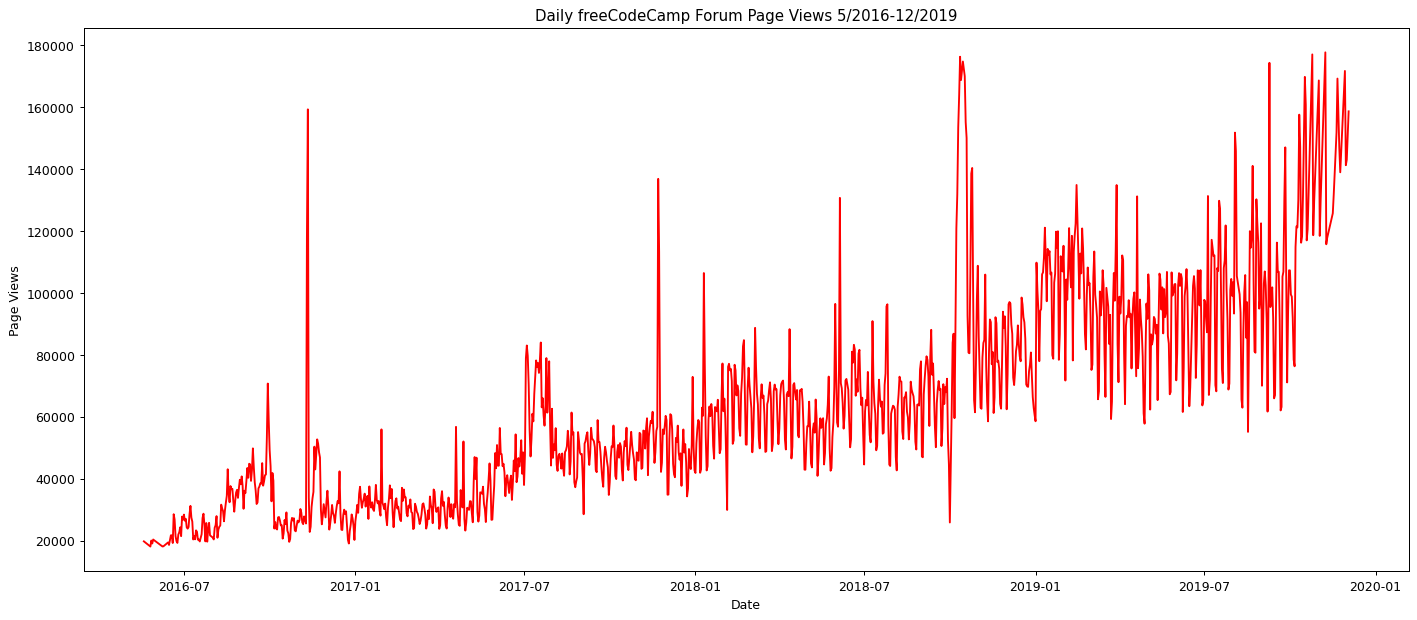

In [160]:
draw_line_plot()

## Barplot

Barplot to visualize average daily page views for each month grouped by year from may 2016 to dec 2019

In [163]:
def draw_bar_plot():
    # copy original dataset for modification specifically for barplot
    df_bar = df.copy()
    
    # index of the dataset is in datetime format. Extract year and month from index 
    df_bar["Years"] = df_bar.index.year
    df_bar["Months"] = df_bar.index.month_name()
    
    # group year and month and convert view to int
    df_bar = pd.DataFrame(df_bar.groupby(["Years", "Months"], sort=False)["value"].mean().round().astype(int))
    df_bar = df_bar.reset_index()
    df_bar = df_bar.rename(columns={"value" : "Average Page Views"})
    
    # create a dictionary for missing month data for 2016
    missing_data = {'Years' : [2016, 2016, 2016, 2016],
               'Months' : ['January', 'February', 'March', 'April'],
               'Average Page Views': [0, 0, 0, 0]}
    
    # concatenate missing data dataframe to dataset
    df_bar = pd.concat([pd.DataFrame(missing_data), df_bar])
    
    # generate the barplot
    fig = plt.figure(figsize=(18, 14))
    sns.barplot(data=df_bar, x="Years", y="Average Page Views", hue="Months", palette="tab10");
    plt.xticks(rotation=90)
    fig.savefig("bar_plot.png")

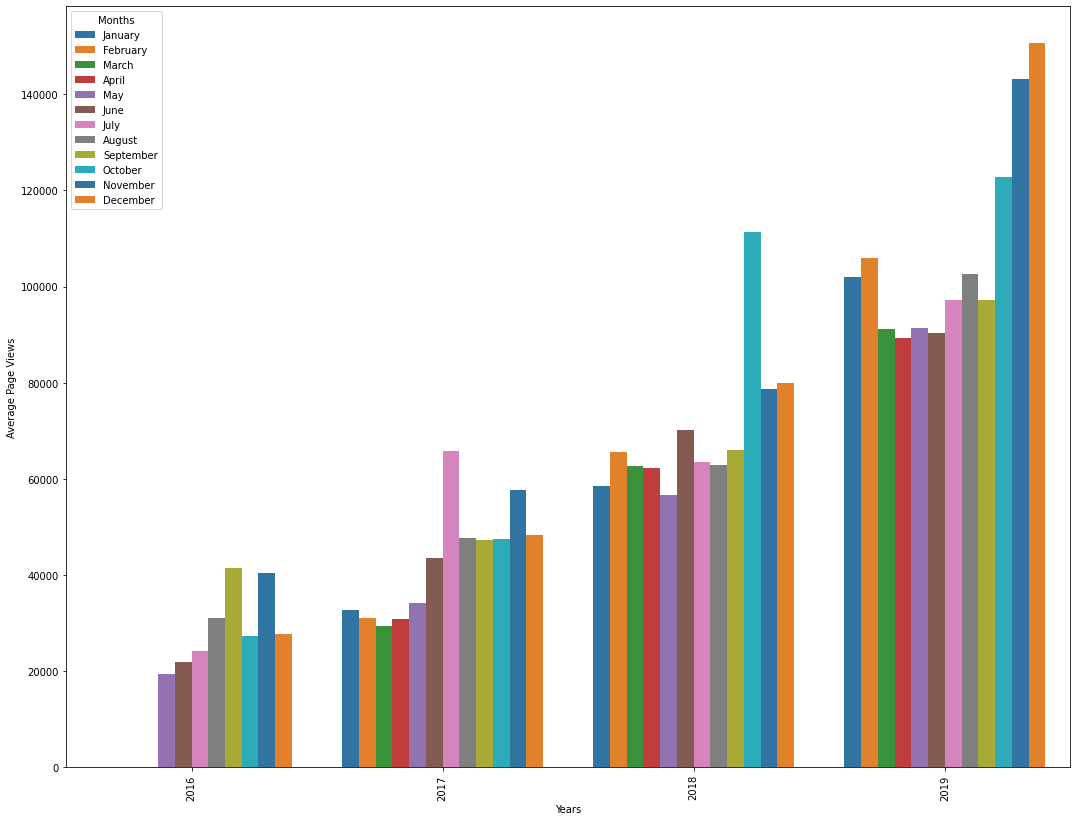

In [164]:
draw_bar_plot()

## Boxplot

In [190]:
def draw_box_plot():
    # copy data for modification
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]
    
    # draw boxplot
    fig, ax = plt.subplots(1, 2, figsize=(35, 10), dpi=100)
    sns.boxplot(x="year", y="value", ax=ax[0],data=df_box)
    ax[0].set_title("Year-wise Box Plot (Trend)")
    ax[0].set_ylabel("Page Views")
    ax[0].set_xlabel("Year")

    month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    sns.boxplot(x="month", y="value", order=month_order, ax=ax[1], data=df_box)
    ax[1].set_title("Month-wise Box Plot (Seasonality)")
    ax[1].set_ylabel("Page Views")
    ax[0].set_xlabel("Month")


    fig.savefig("box_plot.png")

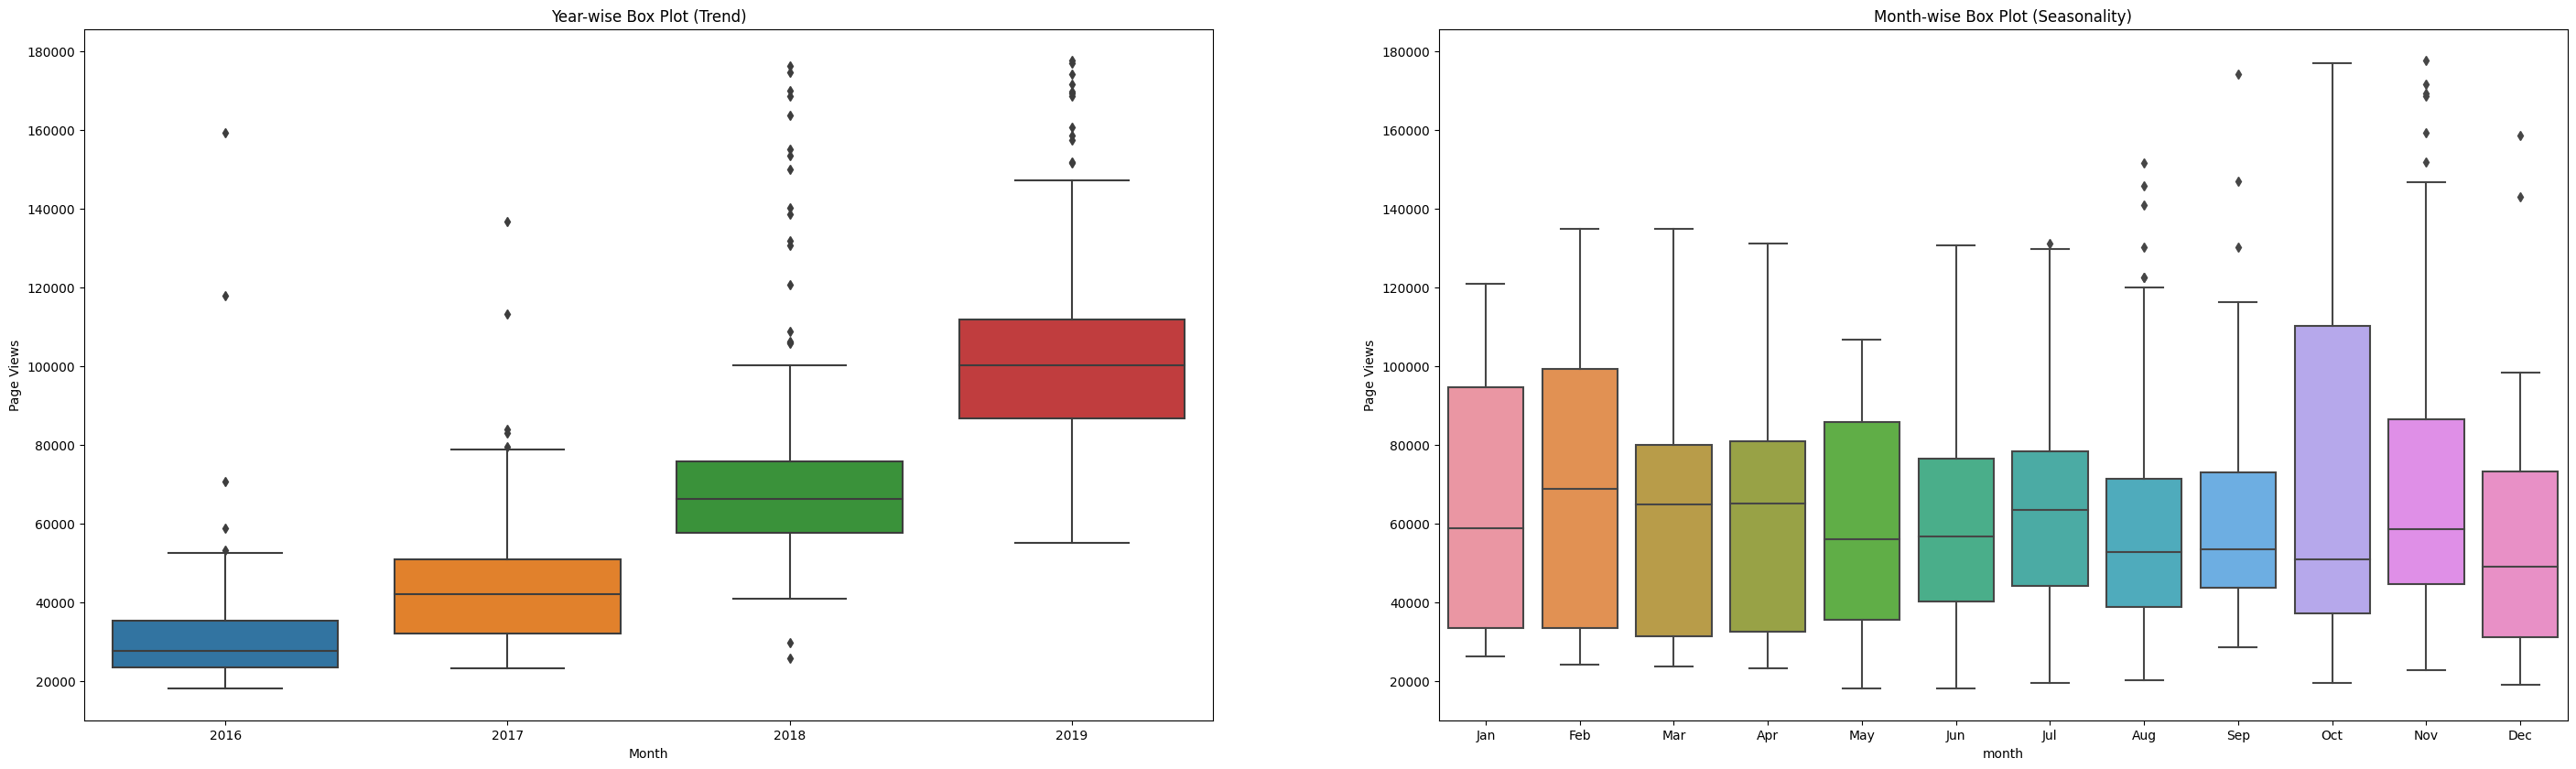

In [191]:
draw_box_plot()